<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression
 
_Instructor:_ Timothy Book, General Assembly DC 
---

_Instructor Note: There are several portions of this lab that are half filled in.  You can use these as independent activity or a refresher walkthrough_

<a id="learning-objectives"></a>
### Learning Objectives
- **Recall** how to perform linear regression in scikit-learn.
- **Demonstrate** why logistic regression is a better alternative for classification than linear regression.
- **Understand** the concepts of probability, odds, e, log, and log-odds in relation to machine learning.
- **Explain** how logistic regression works.
- **Interpret** logistic regression coefficients.
- **Use** logistic regression with categorical features.
- **Compare** logistic regression with other models.
- **Utilize** different metrics for evaluating classifier models.
- **Construct** a confusion matrix based on predicted classes.

### Lesson Guide
- [Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn](#refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn)
- [Refresher: Interpreting Linear Regression Coefficients](#refresher-interpreting-linear-regression-coefficients)
- [Predicting a Categorical Response](#predicting-a-categorical-response)
- [Using Logistic Regression for Classification](#using-logistic-regression-for-classification)
- [Probability, e, Log, and Log Odds](#probability-odds-e-log-and-log-odds)
	- [Understanding e and the Natural Logarithm](#understanding-e-and-the-natural-logarithm)
	- [Log Odds](#the-log-odds)
- [What Is Logistic Regression?](#what-is-logistic-regression)
- [Interpreting Logistic Regression Coefficients](#interpreting-logistic-regression-coefficients)
- [Using Logistic Regression With Categorical Features](#using-logistic-regression-with-categorical-features)
- [Comparing Logistic Regression to Other Models](#comparing-logistic-regression-to-other-models)
- [Advanced Classification Metrics](#advanced-classification-metrics)
	- [Accuracy, True Positive Rate, and False Negative Rate](#accuracy-true-positive-rate-and-false-negative-rate)
	- [The Accuracy Paradox](#the-accuracy-paradox)
- [OPTIONAL: How Many Samples Are Needed?](#samples)
- [Lesson Review](#lesson-review)

# Introduction

In this lesson we learn about Logistic Regression, or what is sometimes referred to as Logistic Classification.

"How can a model be both a Regression and a Classification?" you may ask.  


## Discussion

Have you ever had to sort objects, but everything didn't fit perfectly into groups?

Example:
- Movies/Books
- Socks
- Phone apps


Logistic Regression/Classification uses elements from both the Linear Regression and the K Nearest Neighbors algorithms.

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

In [2]:
# Glass identification data set
glass = pd.read_csv('data/glass.csv')

In [3]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [4]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.glass_type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

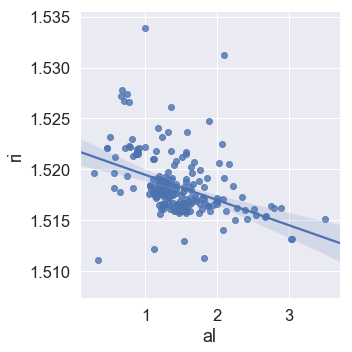

In [6]:
#scatter with regression line with one feature 
sns.lmplot(x='al', y='ri', data=glass);

**How can we draw this plot (just the points — don't worry about the regression line) without using Seaborn?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


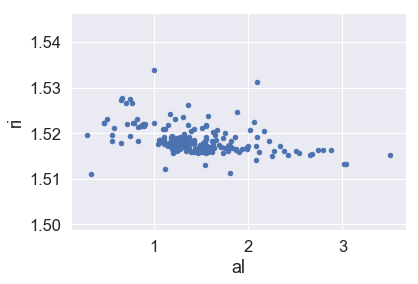

In [7]:
# Scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri');

# Seaborn with parameters
#sns.lmplot(x='al', y='ri', data=glass, fit_reg=False);

# Equivalent scatter plot using Matplotlib
#plt.scatter(glass.al, glass.ri)
#plt.xlabel('al')
#plt.ylabel('ri')


To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [8]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass['ri']

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [9]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

In [10]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


**Plot the predicted `ri` against each `al` as a line.**

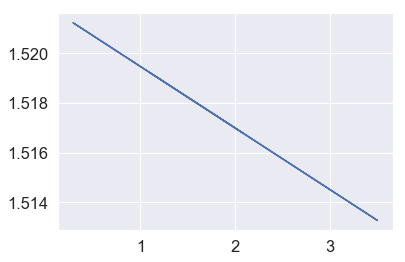

In [11]:
# Plot those predictions connected by a line (try plt.plot()).
plt.plot(glass.al, glass.y_pred)


_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

Text(0, 0.5, 'ri')

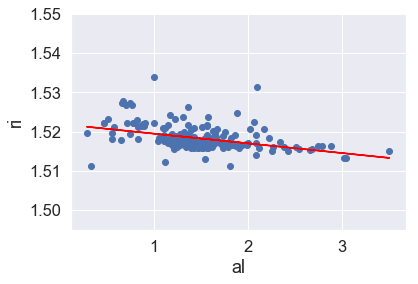

In [12]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri) #data
plt.plot(glass.al, glass.y_pred, color='red') #adds the line which is predictions vs AL
plt.xlabel('al')
plt.ylabel('ri')

---

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [13]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [14]:
import numpy as np

In [15]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
# glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
# glass['household'] = glass.glass_type.map(lambda x: (x > 4) * 1)
glass['household'] = np.where(glass.glass_type > 4, 1, 0)
# glass['household'] = int(glass.glass_type > 4)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


In [16]:
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

In [17]:
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

Text(0, 0.5, 'household')

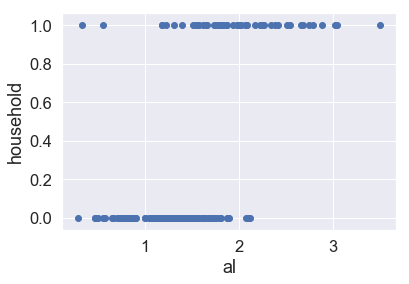

In [18]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [19]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg = LinearRegression()
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg

Text(0, 0.5, 'household')

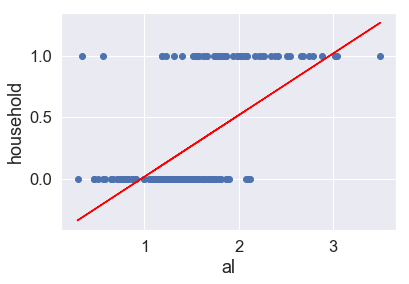

In [20]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [21]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [22]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

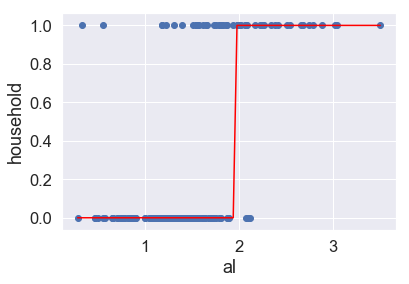

In [23]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [24]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e9)

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

C:\Users\606800\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

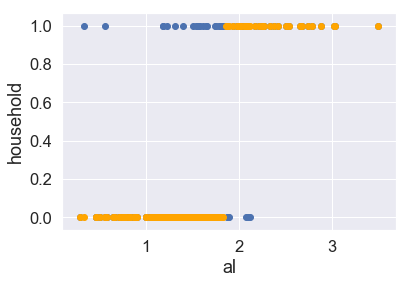

In [25]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.scatter(glass.al, pred, color='orange')
plt.xlabel('al')
plt.ylabel('household')

#orange is prediction, blue would be missed

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [ ]:
logreg.predict_proba(X)[0:10]
#numbers in each row add up to one.  Probabilty of class one vs probabilty of class two

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [26]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [27]:
glass.tail(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7,1.515727,1,0.772118,1,0.941543
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7,1.515652,1,0.787153,1,0.948075
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7,1.515355,1,0.847295,1,0.967901
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,1.515305,1,0.857318,1,0.970399
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,1.515157,1,0.887389,1,0.976813
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1,0.981104
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1,0.986952
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1,0.992690
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1,0.993273
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,1.268283,1,0.999011


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

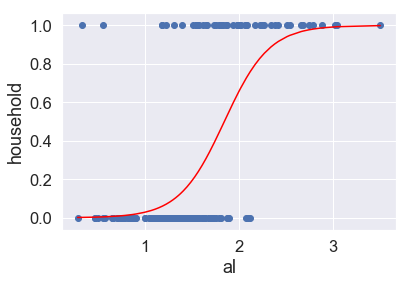

In [28]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.sort_values('al').al, glass.sort_values('al').household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

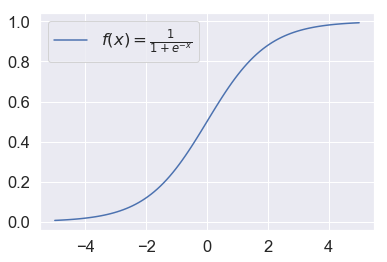

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))


x=np.linspace(-5,5,99)
y=logistic(x)
plt.plot(x, y, label=r'$f(x)=\frac{1}{1+e^{-x}}$')
plt.legend(loc='upper left')
plt.show()

#Martin Sample Code of Logistic Regression 

In [30]:
# Examine some example predictions.
print(logreg.predict_proba(np.array([[1], [2], [3]])))

[[0.97161726 0.02838274]
 [0.34361555 0.65638445]
 [0.00794192 0.99205808]]


### Exercise 1:

- Build and train a logistic regression model.
- Select 2 features for your X
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [31]:
glass.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type',
       'y_pred', 'household', 'household_pred', 'household_pred_class',
       'household_pred_prob'],
      dtype='object')

In [32]:
feature_list = ['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']

In [33]:
feature_list[1:3]

['na', 'mg']

In [34]:
# A:
feature_cols = ["mg", "si"]
X2 = glass[feature_cols]
y2 = glass['household']

In [35]:
model = LogisticRegression(C=1e9, solver='liblinear')
model.fit(X2, y2)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
model.score(X2, y2)

0.8785046728971962

<a id="probability-odds-e-log-and-log-odds"></a>
## Probability vs Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5:1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2:3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1:5
- Even dice roll: probability = 3/6, odds = 3:3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4:2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**As an example we can create a table of probabilities vs. odds, as seen below.**

In [37]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

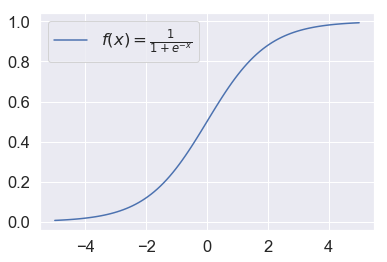

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))


x=np.linspace(-5,5,99)
y=logistic(x)
plt.plot(x, y, label=r'$f(x)=\frac{1}{1+e^{-x}}$')
plt.legend(loc='upper left')
plt.show()

#Martin Sample Code of Logistic Regression 

$f(x)=\frac{1}{1+e^{-x}}$

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \frac{p}{1-p} = \beta_0 + \beta_1x$$

This is called the **logit** function.

$$\log\frac{p}{1-p} = \text{logit } p$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.

**First let's plot our logistic regression predicted probability line again.**

Text(0, 0.5, 'household')

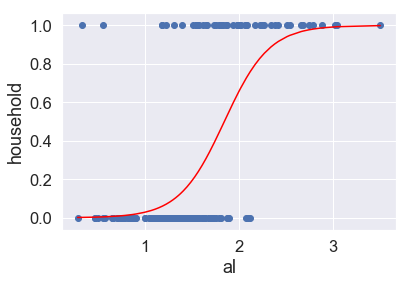

In [39]:
# Plot the predicted probabilities again.
plt.scatter(glass.al, glass.household)
plt.plot(glass.sort_values('al').al, glass.sort_values('al').household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

Remember:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `al`.

**Compute the log odds of `household` when `al=2`.**

In [40]:
# Compute predicted log odds for al=2 using the equation.
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.64722323])

In [41]:
logreg.coef_

array([[4.18040386]])

In [42]:
logreg.intercept_

array([-7.71358449])

In [43]:
lo = -7.7 + 4.18 * 2

In [44]:
lo

0.6599999999999993

In [45]:
np.exp(0.1*logreg.coef_)

array([[1.51898202]])

Now that we have the log odds, we will need to go through the process of converting these log odds to probability.

**Convert the log odds to odds, then the odds to probability.**

In [46]:
# Convert log odds to odds.
odds = np.exp(logodds)
odds

array([1.91022919])

In [47]:
# Convert odds to probability.
prob = odds/(1 + odds)
prob

array([0.65638445])

This finally gives us the predicted probability of `household=1` when `al=2`. You can confirm this is the same as the value you would get out of the `.predict_proba()` method of the sklearn object.

In [58]:
# Compute predicted probability for al=2 using the predict_proba method.
logreg.predict_proba(2)[:, 1]

ValueError: Expected 2D array, got scalar array instead:
array=2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
# Examine the coefficient for al.
list(zip(feature_cols, logreg.coef_[0]))

[('mg', 4.180403861451092)]

In [51]:
# Print the intercept.
logreg.intercept_

array([-7.71358449])

**Interpretation:** A 1-unit increase in `al` is associated with a 4.18-unit increase in the log odds of `household`.

In [52]:
# Increasing al by 1 (so that al=3)
logodds = -4.12790736 + 2.0109909641729442*3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.8704637704833843

In [61]:
# Compute predicted probability for al=3 using the predict_proba method.
logreg.predict_proba(3)[:, 1]

ValueError: Expected 2D array, got scalar array instead:
array=3.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Bottom line:** Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

In [56]:
# Examine the intercept.
logreg.intercept_

array([-7.71358449])

**Intercept interpretation:** For an `al` value of 0, the log-odds of `household` is -4.12790736.

In [57]:
# Convert log odds to probability.
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044652])

That makes sense from the plot above, because the probability of `household=1` should be very low for such a low `al` value.

![Logistic regression beta values](./assets/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

<a id="advanced-classification-metrics"></a>
## Advanced Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

**More Trade-Offs**

The true positive and false positive rates gives us a much clearer picture of where predictions begin to fall apart.

This allows us to adjust our models accordingly.

**Below we will load in some data on admissions to college.**

In [62]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

admissions = pd.read_csv('data/admissions.csv')
admissions = admissions.dropna()
# Get dummy variables for prestige.
admissions = admissions.join(pd.get_dummies(admissions['prestige'].astype('int'),
                                            prefix='prestige'))

#get_dummies converts categorical variable into dummy/indicator variables. 
#you would only want to dummifiy features, not what you are testing for 

In [63]:
admissions.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [64]:
admissions.prestige.unique()

array([3., 1., 4., 2.])

In [65]:
admissions["prestige"] = admissions.prestige.astype("int")

In [66]:
admissions.prestige.unique()

array([3, 1, 4, 2], dtype=int64)

**We can predict the `admit` class from `gre` and use a train-test split to evaluate the performance of our model on a held-out test set.**

In [68]:
X = admissions[['gre']]
y = admissions['admit']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9, solver="lbfgs").fit(X_train, y_train)

#solver is the approach to solve the problem, min the loss, machine learning to solve 

**Recall that our "baseline" accuracy is the proportion of the majority class label.**

In [69]:
1. - y_train.mean()
#null model accuracy

0.696969696969697

In [70]:
y_train.value_counts(normalize=True)
#null model accuracy

0    0.69697
1    0.30303
Name: admit, dtype: float64

In [71]:
# What is our accuracy on the test set?
# print(np.mean(y_test == logit_simple.predict(X_test)))
logit_simple.score(X_test, y_test)

0.64

In [72]:
metrics.confusion_matrix(y_test, logit_simple.predict(X_test))

#shows what is going on in the null model, predicting the most frequent class, always

array([[64,  0],
       [36,  0]], dtype=int64)

**Create a confusion matrix of predictions on our test set using `metrics.confusion_matrix`**.

In [73]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [76]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)
#setting a threshhold at .5, balancing false positives and false negitives 

In [77]:
cm


array([[64,  0],
       [36,  0]], dtype=int64)

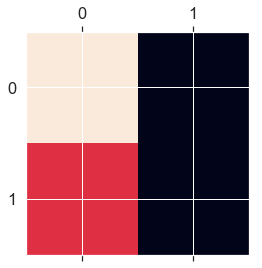

In [78]:
plt.matshow(cm)

**Answer the following:**

- What is our accuracy on the test set?
- True positive rate?
- False positive rate?

<!--
ANSWER: This will depend on the data:
Accuracy: 64%
TPR: 0
FPR: 0
-->

In [ ]:
# Answer here:

A good classifier would have a true positive rate approaching 1 and a false positive rate approaching 0.

In our smoking problem, this model would accurately predict all of the smokers as smokers and not accidentally predict any of the nonsmokers as smokers.

### Trading True Positives and True Negatives

By default, and with respect to the underlying assumptions of logistic regression, we predict a positive class when the probability of the class is greater than .5 and predict a negative class otherwise.

What if we decide to use .3 as a threshold for picking the positive class? Is that even allowed?

This turns out to be a useful strategy. By setting a lower probability threshold we will predict more positive classes. Which means we will predict more true positives, but fewer true negatives.

Making this trade-off is important in applications that have imbalanced penalties for misclassification.

The most popular example is medical diagnostics, where we want as many true positives as feasible. For example, if we are diagnosing cancer we prefer to have false positives, predict a cancer when there is no cancer, that can be later corrected with a more specific test.

We do this in machine learning by setting a low threshold for predicting positives which increases the number of true positives and false positives, but allows us to balance the the costs of being correct and incorrect.

**We can vary the classification threshold for our model to get different predictions.**

In [ ]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .3)

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order can be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.
- **ROC curves and area under a curve (AUC)**
  - Good for ranking and prioritization problems.
  - Allows you to visualize the performance of your classifier across all possible classification thresholds, thus helping you to choose a threshold that appropriately balances sensitivity and specificity.
  - Still useful when there is high class imbalance (unlike classification accuracy/error).
  - Harder to use when there are more than two response classes.
- **Log loss**
  - Most useful when well-calibrated predicted probabilities are important to your business objective.
    - Expected value calculations
    - Triage

The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.